#FFT Amplitude Scaling

The relative amplitude of a sideband follows the relative amplitude of the peak in the FFT.

In [1]:
from numpy.fft import *

In [2]:
import numpy

In [3]:
t = numpy.arange(0,100)

In [4]:
data = 5*numpy.sin(t) + 3*numpy.sin(0.5*t)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


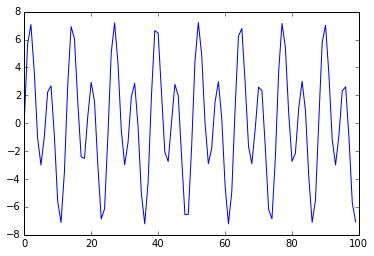

In [6]:
plot(data)

In [7]:
fft_out = abs(fft.fft(data))

In [8]:
fft_out.max()

247.96434997097225

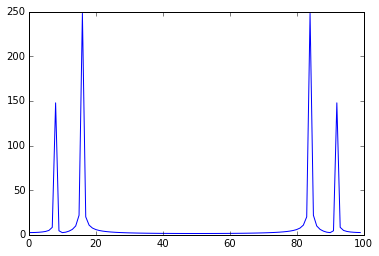

In [9]:
plot(fft_out)

In [20]:
from scipy.signal import find_peaks_cwt

In [32]:
peak_ind = find_peaks_cwt(fft_out, numpy.arange(1,3))

In [33]:
fft_out[peak_ind]

array([   1.45920534,    1.46277576,  247.96434997,   21.86061547,
          8.34397026,  147.79532401,  247.96434997,   20.09975115,
          1.46277576])

In [34]:
247/147.0

1.6802721088435375

In [35]:
5/3.0

1.6666666666666667

Note, this also holds for interference between waves of different amplitudes. I've verified this with beam simulations.

#FFT Frequency Scaling

Off-axis component of the wave is $k_x = k \sin\theta = \frac{2\pi}{780 nm}\sin\theta$ 

In [39]:
K_x = 2*pi/780e-9 * numpy.sin(0.005) # in radians per meter

The step size $\Delta k$ is given by $\frac{2\pi}{(20\mu m)(1340)}$ based on pixel size and pixel count 

In [38]:
delta_K = 2*pi/(20e-6*1340) # deltaK in radians per meter

So the horizontal axis scale should reflect these values. Note, they will not change with the setup so we can hard-code them into our graphing routines.

For example, if a peak is found with index 166 in the FFT output, that corresponds to:

In [42]:
166*delta_K # radians per meter

38918.23735044072

#Conclusion

Scale the horizontal and vertical axes accordingly: horizontal is in units of $\Delta K$ and vertical should be normalized to the DC component on a log scale